In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [98]:
data=pd.read_csv("superstore.csv", encoding="latin1")
data.drop(columns=['Row ID'],inplace=True)

In [100]:
#data[["Discount"]]
#data.head()
#data.tail()
data.dtypes
#data.info()
#data.describe()
#data.describe().T
#data.shape
#data.columns
#data[["Quantity","Discount","Profit","Sales"]].skew() #distribution(positive & negative & zero)
#data["Postal Code"].astype(object)
#data["Order Date"]=pd.to_datetime(data["Order Date"])
#data["Order Date"].astype(object)
#data.isna().sum().sum()
#data.isna().sum()

Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [74]:
temp = list(data.isna().sum())
lst=[]
i=0
for col in data.columns:
    insert_lst=[col,temp[i]]
    lst.append(insert_lst)
    i+=1
data2=pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

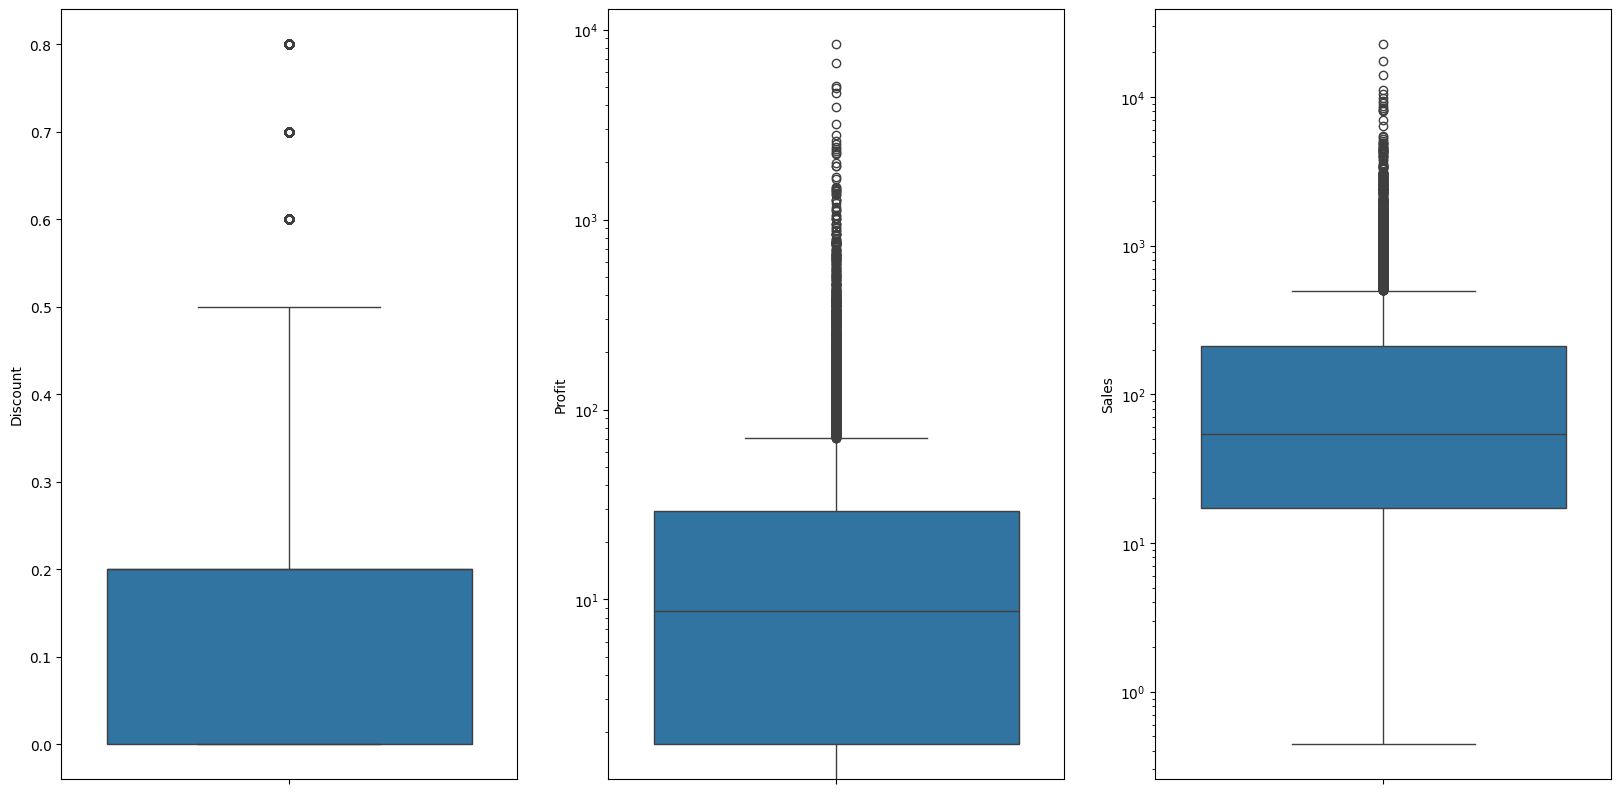

In [87]:
import seaborn as sns 
plt.figure(figsize=(20,10))
feature_to_examine=['Discount','Profit','Sales']
i=1;
for col in feature_to_examine:
    plt.subplot(1,3,i)
    sns.boxplot(data=data,y=col)
    if col in ["Profit", "Sales"]:
        plt.yscale("log")
    i+=1
plt.show()

In [101]:
data['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [102]:
# 1 What are the top selling products in the superstore
date_sorted_by_sales=data.sort_values(by="Sales",ascending=False)
date_sorted_by_sales.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,CA-2014-145317,2014-03-18,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,CA-2016-118689,2016-10-02,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,CA-2017-140151,2017-03-23,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,CA-2017-127180,2017-10-22,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,CA-2017-166709,2017-11-17,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856


In [120]:
# 2 What is the sales trend over time (monthly, yearly)?
data["Year"] = data["Order Date"].dt.year
data["Month"] = data["Order Date"].dt.month
#data
yearly_sales = data.groupby("Year")["Sales"].sum().reset_index()
print(yearly_sales)

monthly_sales = data.groupby([data["Order Date"].dt.to_period("M")])["Sales"].sum().reset_index()
monthly_sales["Order Date"] = monthly_sales["Order Date"].dt.to_timestamp()
print(monthly_sales)

   Year        Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552
   Order Date        Sales
0  2014-01-01   14236.8950
1  2014-02-01    4519.8920
2  2014-03-01   55691.0090
3  2014-04-01   28295.3450
4  2014-05-01   23648.2870
5  2014-06-01   34595.1276
6  2014-07-01   33946.3930
7  2014-08-01   27909.4685
8  2014-09-01   81777.3508
9  2014-10-01   31453.3930
10 2014-11-01   78628.7167
11 2014-12-01   69545.6205
12 2015-01-01   18174.0756
13 2015-02-01   11951.4110
14 2015-03-01   38726.2520
15 2015-04-01   34195.2085
16 2015-05-01   30131.6865
17 2015-06-01   24797.2920
18 2015-07-01   28765.3250
19 2015-08-01   36898.3322
20 2015-09-01   64595.9180
21 2015-10-01   31404.9235
22 2015-11-01   75972.5635
23 2015-12-01   74919.5212
24 2016-01-01   18542.4910
25 2016-02-01   22978.8150
26 2016-03-01   51715.8750
27 2016-04-01   38750.0390
28 2016-05-01   56987.7280
29 2016-06-01   40344.5340
30 2016-07-01   39261.9630
31 2016-08-01   31115.3743
32 2

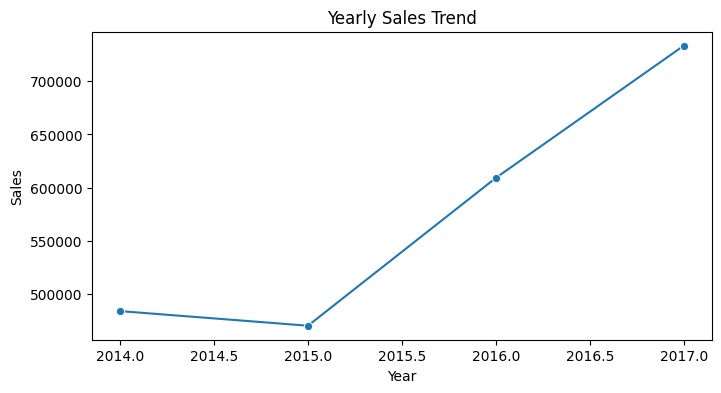

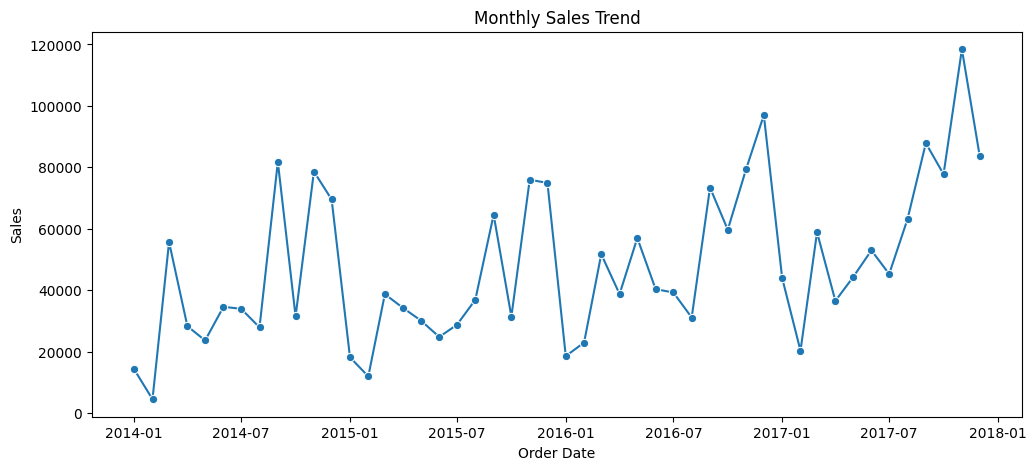

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yearly
plt.figure(figsize=(8,4))
sns.lineplot(data=yearly_sales, x="Year", y="Sales", marker="o")
plt.title("Yearly Sales Trend")
plt.show()

# Monthly
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x="Order Date", y="Sales", marker="o")
plt.title("Monthly Sales Trend")
plt.show()


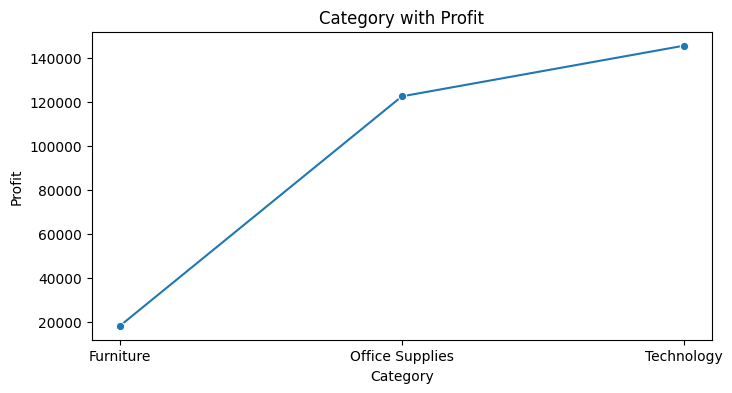

In [139]:
# Which category of products generates the highest revenue and profit?
category=data.groupby("Category")["Profit"].sum().reset_index()
category[category["Profit"]==category["Profit"].max()]

plt.figure(figsize=(8,4))
sns.lineplot(data=category, x="Category", y="Profit", marker="o")
plt.title("Category with Profit")
plt.show()

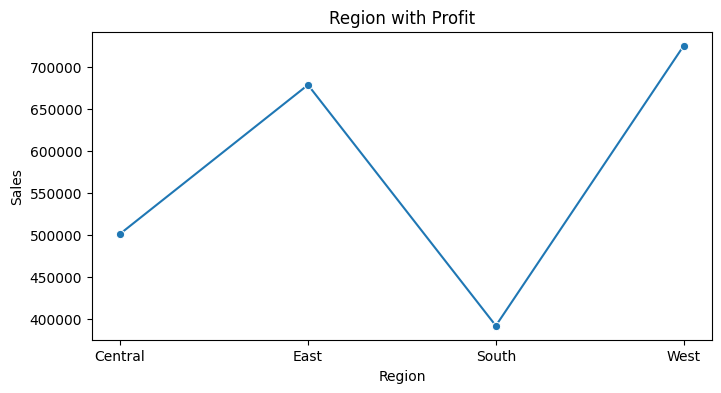

In [140]:
# 4  Which region generates the most sales?
region=data.groupby("Region")["Sales"].sum().reset_index()
region[region["Region"]==region["Region"].max()]

plt.figure(figsize=(8,4))
sns.lineplot(data=region, x="Region", y="Sales", marker="o")
plt.title("Region with Profit")
plt.show()

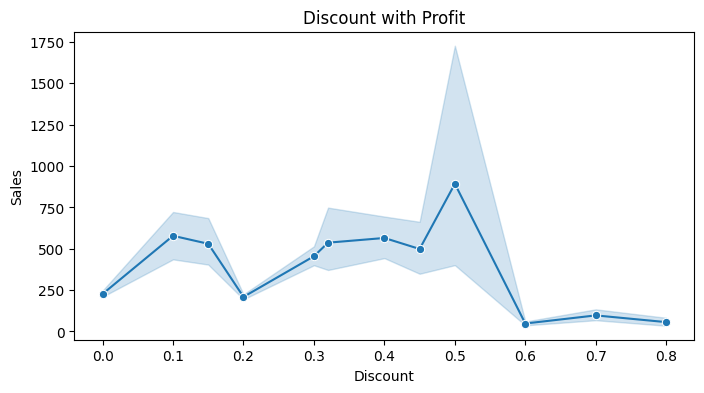

In [141]:
# What is the impact of discounts and promotions on sales
plt.figure(figsize=(8,4))
sns.lineplot(data=data, x="Discount", y="Sales", marker="o")
plt.title("Discount with Profit")
plt.show()

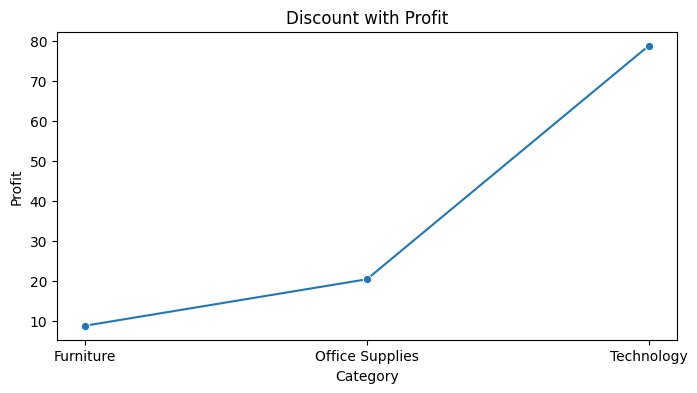

In [149]:
# What is the average profit margin for each product category
category=data.groupby("Category")[["Profit","Sales"]].mean().reset_index()
category["Profit_Margin"]=category["Profit"]/category["Sales"]

plt.figure(figsize=(8,4))
sns.lineplot(data=category, x="Category", y="Profit", marker="o")
plt.title("Discount with Profit")
plt.show()

In [155]:
# Which sub-category of products has the highest demand?
sub_category=data.groupby("Sub-Category")["Order ID"].count().reset_index()
sub_category[sub_category["Order ID"]==sub_category["Order ID"].max()]

,Sub-Category,Order ID
3,Binders,1523
